In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.shape

(25, 2)

In [ ]:
# Descriptive statistics of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


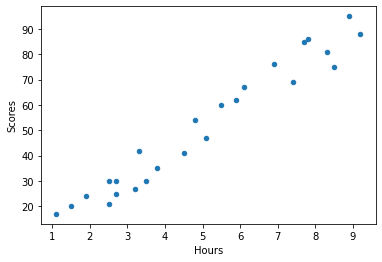

In [ ]:
df.plot(kind = "scatter", x = "Hours", y = "Scores")
plt.show()

In [ ]:
# Checking correlation of the data
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
def skewnees(column):
  """
    Calculate skew

    Parameters:
      column: Series
  """
  col_dist = column.skew()
  if col_dist > 0:
    print(f"The column skew is: {col_dist} (Positive Skew)")
  elif col_dist < 0:
    print(f"The column skew is: {col_dist} (Negative Skew)")
  else:
    print(f"The column skew is: {col_dist} (symmetrical distribution)")


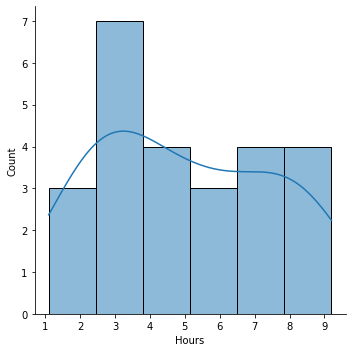

The column skew is: 0.1903382010052985 (Positive Skew)


In [ ]:
# Visualize the Study Hours distribution
sns.displot(data=df, x="Hours", kde=True)
plt.show()

skewnees(df.Hours)

We can see it's a left-skewed distribution but it has a small skew

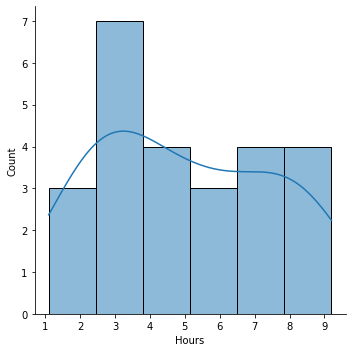

The column skew is: 0.2339646665397317 (Positive Skew)


In [ ]:
# Visualize the Scores distribution
sns.displot(data=df, x="Hours", kde=True)
plt.show()

skewnees(df.Scores)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

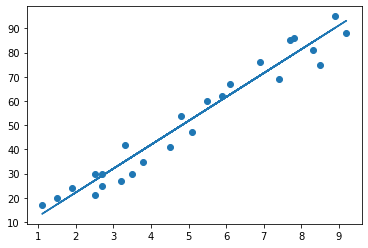

In [ ]:
m = lin_reg.coef_
c = lin_reg.intercept_
line = m * X + c

plt.scatter(X, y)
plt.plot(X, line)
plt.show()

# Predict

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
Predicted_values = pd.DataFrame({"Target":y_test, "Predicted":y_pred})
Predicted_values

# Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("Mean Squared Error:",mean_absolute_error(y_test, y_pred))
print("R2 Score:",r2_score(y_test, y_pred))

Mean Squared Error: 5.3994503136120064
R2 Score: 0.9298077534821835


## What will be predicted score if a student studies for 9.25 hrs/day?

In [ ]:
hours = 9.25
score = round(lin_reg.predict([[hours]])[0])

print(f"if a student studies for {hours} hrs/day will score {score}")

if a student studies for 9.25 hrs/day will score 94
